In [1]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

with open("../results.json", 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['general_experiment'])
df = df[df['flow'] != 'None']
df['log10_flow_params'] = np.log10(df['n_flow_params']).astype(int)
df = df[(df['log10_flow_params'] > 1) & (df['log10_flow_params'] < 8)]

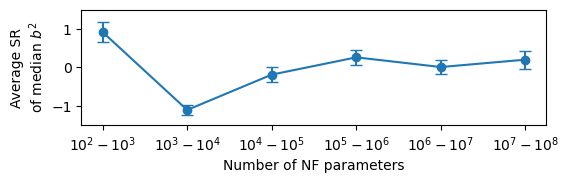

In [2]:
from notebooks.util import standardized_rank

out = standardized_rank(
    df,
    rank_what=['log10_flow_params'],
    rank_across=['benchmark']
).reset_index()

fig, ax = plt.subplots(figsize=(6, 1.5))
ax.errorbar(out['log10_flow_params'], out['mean_rank'], out['sem_rank'], capsize=4, marker='o')
ax.set_xticks([2, 3, 4, 5, 6, 7], ["$10^2-10^3$", "$10^3-10^4$", "$10^4-10^5$", "$10^5-10^6$", "$10^6-10^7$", "$10^7-10^8$"])
ax.set_xlabel('Number of NF parameters')
ax.set_ylabel('Average SR\nof median $b^2$')
ax.set_ylim(-1.5, 1.5)
fig.savefig('images/nf-capacity.png', bbox_inches='tight', dpi=600)
fig.savefig('images/nf-capacity.pdf', bbox_inches='tight')
plt.show()